In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from scipy import stats
#import graphviz #for decision tree
#from graphviz import Graph

#functions
#import wrangle as w
#import explore as exp
#import model as m

# working with dates
from datetime import datetime

warnings.filterwarnings("ignore")

#evaluate
import sklearn.preprocessing

#feature engineering
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
df = pd.read_csv('prepped_data.csv')
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

age gender          race        date         city state  zipcode     county  \
0  24   Male  Unknown Race  2021-05-09    Leicester    MA   1524.0  Worcester   
1  52   Male  Unknown Race  2021-05-07     Rutledge    TN  37861.0   Grainger   
2  47   Male         White  2021-05-06  San Andreas    CA  95249.0  Calaveras   
3  49   Male         White  2021-05-05    Las Vegas    NV  89104.0      Clark   
4  30   Male         Black  2021-05-03       Biloxi    MS  39532.0   Harrison   

                                  agency_responsible cause_of_death  ...  \
0                        Leicester Police Department        gunshot  ...   
1  Bean Station Police Department, Rutledge Polic...        gunshot  ...   
2                  Calaveras County Sheriff's Office        gunshot  ...   
3           Las Vegas Metropolitan Police Department        gunshot  ...   
4                           Biloxi Police Department        gunshot  ...   

  mental_illness armed_unarmed_status alleged_weapon alleged_threat_lvl  \
0             no      Allegedly Armed            gun             attack   
1             no      Allegedly Armed            gun             attack   
2             no      Allegedly Armed            gun              other   
3             no      Allegedly Armed            gun             attack   
4             no      Allegedly Armed            gun              other   

       fleeing body_camera geography  encounter_type_draft  \
0  not fleeing          no  Suburban                 other   
1  not fleeing          no     Rural  part 1 violent crime   
2  not fleeing          no     Rural  part 1 violent crime   
3  not fleeing          no     Urban  part 1 violent crime   
4          car          no  Suburban  part 1 violent crime   

  initial_reported_reason_for_encounter_draft  \
0                        deliberate car crash   
1                                    shooting   
2                           hostage situation   
3                                    shooting   
4                                    shooting   

  known_past_shootings_of_Officer_draft  
0                                     0  
1                                     0  
2                                     0  
3                                     0  
4                                     0  

[5 rows x 23 columns]

In [3]:
df.gender.value_counts()

Male           6306
Female          305
Transgender       8
Unknown           4
Male              1
Name: gender, dtype: int64

In [4]:
df[df.gender == "Unknown"]

age   gender          race        date       city state  zipcode  \
451        19  Unknown         Black  2020-11-13  Cleveland    OH  44104.0   
553   Unknown  Unknown  Unknown Race  2020-10-01  Coal City    WV  25823.0   
5073       29  Unknown         Black  2016-07-04     Rosser    TX  75158.0   
5724       25  Unknown         Asian  2015-11-30     Aurora    CO  80017.0   

        county                       agency_responsible cause_of_death  ...  \
451   Cuyahoga  Cuyahoga Metropolitan Housing Authority        gunshot  ...   
553    Raleigh          Raleigh County Sheriff's Office        gunshot  ...   
5073   Kaufman          Kaufman County Sheriff's Office        gunshot  ...   
5724  Arapahoe                 Aurora Police Department        gunshot  ...   

     mental_illness armed_unarmed_status alleged_weapon alleged_threat_lvl  \
451              no      Allegedly Armed            gun             attack   
553              no      Allegedly Armed            gun             attack   
5073             no      Allegedly Armed          knife              other   
5724        unknown      Allegedly Armed   meat cleaver             attack   

          fleeing body_camera     geography  encounter_type_draft  \
451   not fleeing          no  Undetermined  part 1 violent crime   
553           car          no         Rural          none/unknown   
5073  not fleeing         yes         Rural  part 1 violent crime   
5724          car          no      Suburban  part 1 violent crime   

     initial_reported_reason_for_encounter_draft  \
451                                     shooting   
553                                  unavailable   
5073                           traffic violation   
5724                           traffic violation   

     known_past_shootings_of_Officer_draft  
451                                      0  
553                                      0  
5073                                     0  
5724                                     0  

[4 rows x 23 columns]

In [5]:
df[df.gender == "Male"]

age gender          race        date         city state  zipcode  \
0     24   Male  Unknown Race  2021-05-09    Leicester    MA   1524.0   
1     52   Male  Unknown Race  2021-05-07     Rutledge    TN  37861.0   
2     47   Male         White  2021-05-06  San Andreas    CA  95249.0   
3     49   Male         White  2021-05-05    Las Vegas    NV  89104.0   
4     30   Male         Black  2021-05-03       Biloxi    MS  39532.0   
...   ..    ...           ...         ...          ...   ...      ...   
6619  20   Male         Black  2013-12-07   Dorchester    MA   2124.0   
6620  21   Male         Black  2013-08-07       Boston    MA   2124.0   
6621  38   Male      Hispanic  2013-06-02   Dorchester    MA   2124.0   
6622  38   Male         Black  2013-05-09       Deland    FL  32720.0   
6623  51   Male         Black  2013-04-21       Dallas    TX  75215.0   

         county                                 agency_responsible  \
0     Worcester                        Leicester Police Department   
1      Grainger  Bean Station Police Department, Rutledge Polic...   
2     Calaveras                  Calaveras County Sheriff's Office   
3         Clark           Las Vegas Metropolitan Police Department   
4      Harrison                           Biloxi Police Department   
...         ...                                                ...   
6619    Suffolk                           Boston Police Department   
6620    Suffolk                           Boston Police Department   
6621    Suffolk                           Boston Police Department   
6622    Volusia                           DeLand Police Department   
6623     Dallas                           Dallas Police Department   

     cause_of_death  ... mental_illness                armed_unarmed_status  \
0           gunshot  ...             no                     Allegedly Armed   
1           gunshot  ...             no                     Allegedly Armed   
2           gunshot  ...             no                     Allegedly Armed   
3           gunshot  ...             no                     Allegedly Armed   
4           gunshot  ...             no                     Allegedly Armed   
...             ...  ...            ...                                 ...   
6619        gunshot  ...             no                     Allegedly Armed   
6620        gunshot  ...             no                     Allegedly Armed   
6621        gunshot  ...        unknown                     Allegedly Armed   
6622        vehicle  ...             no  Unarmed/Did Not Have Actual Weapon   
6623        vehicle  ...             no  Unarmed/Did Not Have Actual Weapon   

     alleged_weapon alleged_threat_lvl      fleeing body_camera geography  \
0               gun             attack  not fleeing          no  Suburban   
1               gun             attack  not fleeing          no     Rural   
2               gun              other  not fleeing          no     Rural   
3               gun             attack  not fleeing          no     Urban   
4               gun              other          car          no  Suburban   
...             ...                ...          ...         ...       ...   
6619            gun             attack         foot          no     Urban   
6620            gun             attack  not fleeing          no     Urban   
6621            gun             attack  not fleeing          no     Urban   
6622      no object              other         foot          no  Suburban   
6623           bike              other  not fleeing          no     Urban   

      encounter_type_draft initial_reported_reason_for_encounter_draft  \
0                    other                        deliberate car crash   
1     part 1 violent crime                                    shooting   
2     part 1 violent crime                           hostage situation   
3     part 1 violent crime                                    shooting   
4     part 1 violent crime                 

In [6]:
df[df.gender == "Male "]

age gender          race        date    city state  zipcode county  \
549  39  Male   Unknown Race  2020-10-02  Mojave    CA  93501.0   Kern   

               agency_responsible cause_of_death  ... mental_illness  \
549  Kern County Sheriff's Office        gunshot  ...             no   

    armed_unarmed_status alleged_weapon alleged_threat_lvl fleeing  \
549              Unclear   undetermined              other    foot   

    body_camera geography encounter_type_draft  \
549          no     Rural         traffic stop   

    initial_reported_reason_for_encounter_draft  \
549                           traffic violation   

    known_past_shootings_of_Officer_draft  
549                                     0  

[1 rows x 23 columns]

In [7]:
df.gender.str.lower()

0       male
1       male
2       male
3       male
4       male
        ... 
6619    male
6620    male
6621    male
6622    male
6623    male
Name: gender, Length: 6624, dtype: object

In [8]:
df.gender.str.lower().str.strip()

0       male
1       male
2       male
3       male
4       male
        ... 
6619    male
6620    male
6621    male
6622    male
6623    male
Name: gender, Length: 6624, dtype: object

In [9]:
df['gender'] = df.gender.str.lower().str.strip()

In [10]:
df.head(2)

age gender          race        date       city state  zipcode     county  \
0  24   male  Unknown Race  2021-05-09  Leicester    MA   1524.0  Worcester   
1  52   male  Unknown Race  2021-05-07   Rutledge    TN  37861.0   Grainger   

                                  agency_responsible cause_of_death  ...  \
0                        Leicester Police Department        gunshot  ...   
1  Bean Station Police Department, Rutledge Polic...        gunshot  ...   

  mental_illness armed_unarmed_status alleged_weapon alleged_threat_lvl  \
0             no      Allegedly Armed            gun             attack   
1             no      Allegedly Armed            gun             attack   

       fleeing body_camera geography  encounter_type_draft  \
0  not fleeing          no  Suburban                 other   
1  not fleeing          no     Rural  part 1 violent crime   

  initial_reported_reason_for_encounter_draft  \
0                        deliberate car crash   
1                                    shooting   

  known_past_shootings_of_Officer_draft  
0                                     0  
1                                     0  

[2 rows x 23 columns]

In [11]:
df.gender.value_counts()

male           6307
female          305
transgender       8
unknown           4
Name: gender, dtype: int64

In [12]:
df['gender'] = np.where(df.gender =="unknown", "male", df.gender)

In [13]:
df.gender.value_counts()

male           6311
female          305
transgender       8
Name: gender, dtype: int64

In [14]:
df.set_index('date').sort_index()

age gender          race         city state  zipcode     county  \
date                                                                         
2013-04-21  51   male         Black       Dallas    TX  75215.0     Dallas   
2013-05-09  38   male         Black       Deland    FL  32720.0    Volusia   
2013-06-02  38   male      Hispanic   Dorchester    MA   2124.0    Suffolk   
2013-08-07  21   male         Black       Boston    MA   2124.0    Suffolk   
2013-12-07  20   male         Black   Dorchester    MA   2124.0    Suffolk   
...         ..    ...           ...          ...   ...      ...        ...   
2021-05-03  30   male         Black       Biloxi    MS  39532.0   Harrison   
2021-05-05  49   male         White    Las Vegas    NV  89104.0      Clark   
2021-05-06  47   male         White  San Andreas    CA  95249.0  Calaveras   
2021-05-07  52   male  Unknown Race     Rutledge    TN  37861.0   Grainger   
2021-05-09  24   male  Unknown Race    Leicester    MA   1524.0  Worcester   

                                           agency_responsible cause_of_death  \
date                                                                           
2013-04-21                           Dallas Police Department        vehicle   
2013-05-09                           DeLand Police Department        vehicle   
2013-06-02                           Boston Police Department        gunshot   
2013-08-07                           Boston Police Department        gunshot   
2013-12-07                           Boston Police Department        gunshot   
...                                                       ...            ...   
2021-05-03                           Biloxi Police Department        gunshot   
2021-05-05           Las Vegas Metropolitan Police Department        gunshot   
2021-05-06                  Calaveras County Sheriff's Office        gunshot   
2021-05-07  Bean Station Police Department, Rutledge Polic...        gunshot   
2021-05-09                        Leicester Police Department        gunshot   

                                 description_of_circumstances  ...  \
date                                                           ...   
2013-04-21  Burgess and partner Michael Puckett said they ...  ...   
2013-05-09  Marlon Brown fled from an attempted traffic st...  ...   
2013-06-02  Police responded to Willowwood Street in Dorch...  ...   
2013-08-07  Boston drug control unit Officers Harry Jean a...  ...   
2013-12-07  Dookhran, with a significant criminal record, ...  ...   
...                                                       ...  ...   
2021-05-03  Police were searching for an alleged kidnapper...  ...   
2021-05-05  Officers responded to a report of gunshots at ...  ...   
2021-05-06  Around 10:30 p.m., dispatchers got a call abou...  ...   
2021-05-07  Deputies responded to reports of a man shootin...  ...   
2021-05-09  A man allegedly crashed an SUV into the Leices...  ...   

           mental_illness                armed_unarmed_status alleged_weapon  \
date                                                                           
2013-04-21             no  Unarmed/Did Not Have Actual Weapon           bike   
2013-05-09             no  Unarmed/Did Not Have Actual Weapon      no object   
2013-06-02        unknown                     Allegedly Armed            gun   
2013-08-07             no                     Allegedly Armed            gun   
2013-12-07             no                     Allegedly Armed            gun   
...                   ...                                 ...            ...   
2021-05-03             no                     Allegedly Armed            gun   
2021-05-05             no                     Allegedly Armed            gun   
2021-05-06             no                     Allegedly Armed            gun   
2021-05-07             no                     Allegedly Armed            gun   
2021-05-09             no                     Allegedly Armed            gun   

   

In [15]:
df = df.set_index('date').sort_index()

In [16]:
df.index = pd.to_datetime(df.index)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6624 entries, 2013-04-21 to 2021-05-09
Data columns (total 22 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   age                                          6624 non-null   object 
 1   gender                                       6624 non-null   object 
 2   race                                         6624 non-null   object 
 3   city                                         6624 non-null   object 
 4   state                                        6624 non-null   object 
 5   zipcode                                      6624 non-null   float64
 6   county                                       6624 non-null   object 
 7   agency_responsible                           6624 non-null   object 
 8   cause_of_death                               6624 non-null   object 
 9   description_of_circumstances                 6624 non-nu

In [18]:
pd.get_dummies(df.gender, prefix='is')

is_female  is_male  is_transgender
date                                          
2013-04-21          0        1               0
2013-05-09          0        1               0
2013-06-02          0        1               0
2013-08-07          0        1               0
2013-12-07          0        1               0
...               ...      ...             ...
2021-05-03          0        1               0
2021-05-05          0        1               0
2021-05-06          0        1               0
2021-05-07          0        1               0
2021-05-09          0        1               0

[6624 rows x 3 columns]

In [19]:
gender_dummies = pd.get_dummies(df.gender, prefix='is')

In [20]:
df = pd.concat([df, gender_dummies], axis =1)

In [21]:
df.head(2)

age gender   race    city state  zipcode   county  \
date                                                           
2013-04-21  51   male  Black  Dallas    TX  75215.0   Dallas   
2013-05-09  38   male  Black  Deland    FL  32720.0  Volusia   

                  agency_responsible cause_of_death  \
date                                                  
2013-04-21  Dallas Police Department        vehicle   
2013-05-09  DeLand Police Department        vehicle   

                                 description_of_circumstances  ...  \
date                                                           ...   
2013-04-21  Burgess and partner Michael Puckett said they ...  ...   
2013-05-09  Marlon Brown fled from an attempted traffic st...  ...   

           alleged_threat_lvl      fleeing body_camera geography  \
date                                                               
2013-04-21              other  not fleeing          no     Urban   
2013-05-09              other         foot          no  Suburban   

            encounter_type_draft initial_reported_reason_for_encounter_draft  \
date                                                                           
2013-04-21  part 1 violent crime                           traffic violation   
2013-05-09  part 1 violent crime                           traffic violation   

           known_past_shootings_of_Officer_draft is_female is_male  \
date                                                                 
2013-04-21                                     0         0       1   
2013-05-09                                     0         0       1   

           is_transgender  
date                       
2013-04-21              0  
2013-05-09              0  

[2 rows x 25 columns]

In [22]:
df.alleged_threat_lvl.value_counts()

attack          4248
other           2025
undetermined     349
none               1
Other              1
Name: alleged_threat_lvl, dtype: int64

In [23]:
df['alleged_threat_lvl'] = df.alleged_threat_lvl.str.lower()

In [24]:
df.alleged_threat_lvl.value_counts()

attack          4248
other           2026
undetermined     349
none               1
Name: alleged_threat_lvl, dtype: int64

In [25]:
df.shape

(6624, 25)

In [26]:
df[(df.alleged_threat_lvl != 'undetermined') & (df.alleged_threat_lvl != 'none')].shape

(6274, 25)

In [27]:
df = df[(df.alleged_threat_lvl != 'undetermined') & (df.alleged_threat_lvl != 'none')]

In [28]:
np.where(df.alleged_threat_lvl == "attack", 1, 0)

array([0, 0, 1, ..., 0, 1, 1])

In [29]:
df['alleged_threat_lvl'] = np.where(df.alleged_threat_lvl == "attack", 1, 0)

In [30]:
df.head(2)

age gender   race    city state  zipcode   county  \
date                                                           
2013-04-21  51   male  Black  Dallas    TX  75215.0   Dallas   
2013-05-09  38   male  Black  Deland    FL  32720.0  Volusia   

                  agency_responsible cause_of_death  \
date                                                  
2013-04-21  Dallas Police Department        vehicle   
2013-05-09  DeLand Police Department        vehicle   

                                 description_of_circumstances  ...  \
date                                                           ...   
2013-04-21  Burgess and partner Michael Puckett said they ...  ...   
2013-05-09  Marlon Brown fled from an attempted traffic st...  ...   

           alleged_threat_lvl      fleeing body_camera geography  \
date                                                               
2013-04-21                  0  not fleeing          no     Urban   
2013-05-09                  0         foot          no  Suburban   

            encounter_type_draft  initial_reported_reason_for_encounter_draft  \
date                                                                            
2013-04-21  part 1 violent crime                            traffic violation   
2013-05-09  part 1 violent crime                            traffic violation   

           known_past_shootings_of_Officer_draft is_female is_male  \
date                                                                 
2013-04-21                                     0         0       1   
2013-05-09                                     0         0       1   

           is_transgender  
date                       
2013-04-21              0  
2013-05-09              0  

[2 rows x 25 columns]

In [31]:
df.mental_illness.str.lower().str.strip()

date
2013-04-21         no
2013-05-09         no
2013-06-02    unknown
2013-08-07         no
2013-12-07         no
               ...   
2021-05-03         no
2021-05-05         no
2021-05-06         no
2021-05-07         no
2021-05-09         no
Name: mental_illness, Length: 6274, dtype: object

In [32]:
df['mental_illness'] = df.mental_illness.str.lower().str.strip()

In [33]:
# lower string
df['race'] = df.race.str.lower().str.strip()

In [34]:
df['race'] = np.where(df['race'].str.contains('asian|pacific islander'), "asian/pacific islander", df.race)

In [35]:
df.race.value_counts()

white                     2791
black                     1552
hispanic                  1139
unknown race               557
asian/pacific islander     139
native american             96
Name: race, dtype: int64

In [36]:
df['is_white'] = np.where(df.race == "white", 1, 0)

In [37]:
df.head(2)

age gender   race    city state  zipcode   county  \
date                                                           
2013-04-21  51   male  black  Dallas    TX  75215.0   Dallas   
2013-05-09  38   male  black  Deland    FL  32720.0  Volusia   

                  agency_responsible cause_of_death  \
date                                                  
2013-04-21  Dallas Police Department        vehicle   
2013-05-09  DeLand Police Department        vehicle   

                                 description_of_circumstances  ...  \
date                                                           ...   
2013-04-21  Burgess and partner Michael Puckett said they ...  ...   
2013-05-09  Marlon Brown fled from an attempted traffic st...  ...   

                fleeing body_camera geography  encounter_type_draft  \
date                                                                  
2013-04-21  not fleeing          no     Urban  part 1 violent crime   
2013-05-09         foot          no  Suburban  part 1 violent crime   

           initial_reported_reason_for_encounter_draft  \
date                                                     
2013-04-21                           traffic violation   
2013-05-09                           traffic violation   

            known_past_shootings_of_Officer_draft is_female is_male  \
date                                                                  
2013-04-21                                      0         0       1   
2013-05-09                                      0         0       1   

           is_transgender is_white  
date                                
2013-04-21              0        0  
2013-05-09              0        0  

[2 rows x 26 columns]

In [38]:
def split_df(df, target, seed):
    '''
    split_df will take one argument(df) and 
    then split our data into 20/80, 
    then split the 80% into 30/70
    
    performs a train, validate, test split
    
    splits each of the 3 samples into a dataframe with independent variables
    and a series with the dependent, or target variable. 
    
    The function returns 6 dataframes and 3 series:
    train, validate, test split, X_train (df) & y_train (series), X_validate & y_validate, X_test & y_test. 
    '''
    # Train, Validate, and test
    train_and_validate, test = train_test_split(df, test_size=0.2, random_state=seed)
    train, validate = train_test_split(train_and_validate, test_size=0.3, random_state=seed)
    
    # Split with X and y
    X_train = train.drop(columns=[target])
    y_train = train[target]
    
    X_validate = validate.drop(columns=[target])
    y_validate = validate[target]
    
    X_test = test.drop(columns=[target])
    y_test = test[target]
    
    return train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test 



In [39]:
# split data

train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = split_df(df, "alleged_threat_lvl", 3210)

In [40]:
train.shape, validate.shape, test.shape, X_train.shape, y_train.shape, X_validate.shape, y_validate.shape, X_test.shape, y_test.shape

((3513, 26),
 (1506, 26),
 (1255, 26),
 (3513, 25),
 (3513,),
 (1506, 25),
 (1506,),
 (1255, 25),
 (1255,))

In [41]:
df.gender.value_counts()

male           5974
female          292
transgender       8
Name: gender, dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6274 entries, 2013-04-21 to 2021-05-09
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   age                                          6274 non-null   object 
 1   gender                                       6274 non-null   object 
 2   race                                         6274 non-null   object 
 3   city                                         6274 non-null   object 
 4   state                                        6274 non-null   object 
 5   zipcode                                      6274 non-null   float64
 6   county                                       6274 non-null   object 
 7   agency_responsible                           6274 non-null   object 
 8   cause_of_death                               6274 non-null   object 
 9   description_of_circumstances                 6274 non-nu

In [43]:
pd.crosstab(train.gender, train.alleged_threat_lvl, normalize = True)

alleged_threat_lvl         0         1
gender                                
female              0.015941  0.024196
male                0.306006  0.651865
transgender         0.001139  0.000854

<AxesSubplot:xlabel='gender'>

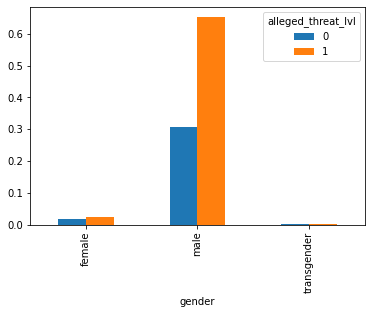

In [44]:
pd.crosstab(train.gender, train.alleged_threat_lvl, normalize= True).plot(kind= 'bar')

alt.Chart(...)

In [46]:
pd.crosstab(train.gender, train.alleged_threat_lvl, normalize ='index')

alleged_threat_lvl         0         1
gender                                
female              0.397163  0.602837
male                0.319465  0.680535
transgender         0.571429  0.428571

<AxesSubplot:xlabel='gender'>

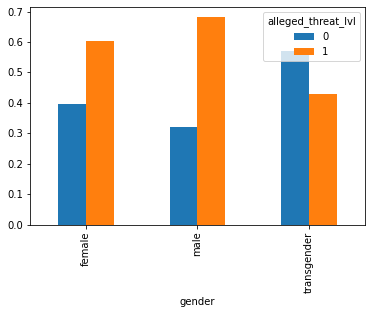

In [47]:
pd.crosstab(train.gender, train.alleged_threat_lvl, normalize ='index').plot(kind= 'bar')

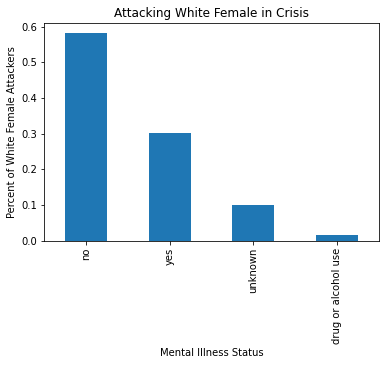

In [48]:
df[(df.is_white != 0) & (df.gender == "female")].mental_illness.value_counts(normalize=True).plot(kind= 'bar', )
plt.title("Attacking White Female in Crisis")
plt.xlabel('Mental Illness Status')
plt.ylabel('Percent of White Female Attackers')
plt.show()

In [49]:
pd.crosstab(train.gender, train.mental_illness, normalize ='index')

mental_illness  drug or alcohol use        no   unknown       yes
gender                                                           
female                     0.014184  0.574468  0.106383  0.304965
male                       0.027935  0.672214  0.107281  0.192571
transgender                0.000000  0.571429  0.142857  0.285714

In [50]:
pd.crosstab(train.gender, train.mental_illness, normalize = True)

mental_illness  drug or alcohol use        no   unknown       yes
gender                                                           
female                     0.000569  0.023057  0.004270  0.012240
male                       0.026758  0.643894  0.102761  0.184458
transgender                0.000000  0.001139  0.000285  0.000569

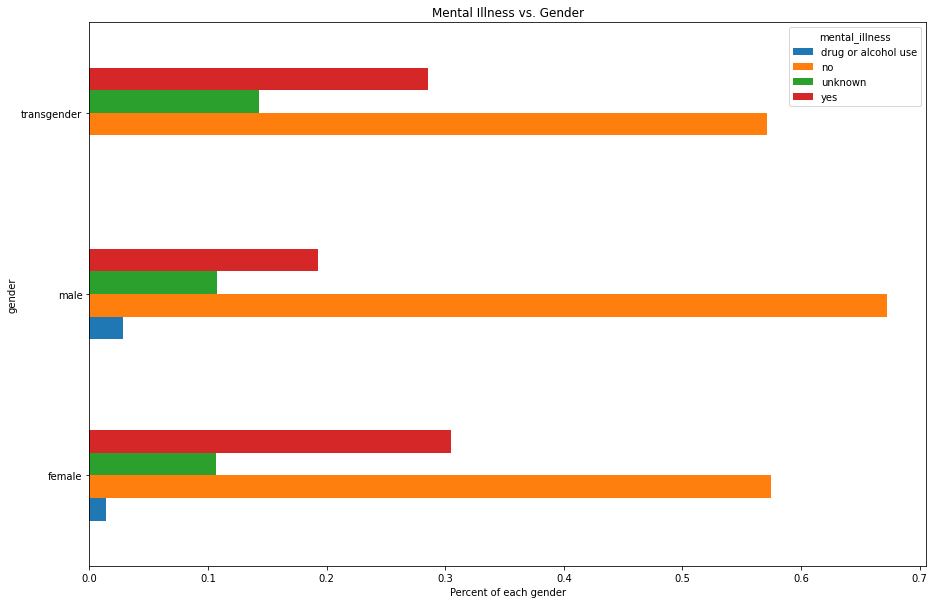

In [51]:
pd.crosstab(train.gender, train.mental_illness, normalize ='index').plot.barh(figsize=(15, 10))
plt.title("Mental Illness vs. Gender")
plt.xlabel('Percent of each gender')
plt.show()

In [52]:
pd.crosstab(train.gender, train.race, normalize ='index')

race         asian/pacific islander     black  hispanic  native american  \
gender                                                                     
female                     0.028369  0.148936  0.127660         0.014184   
male                       0.021694  0.259733  0.183061         0.015453   
transgender                0.000000  0.571429  0.000000         0.000000   

race         unknown race     white  
gender                               
female           0.085106  0.595745  
male             0.093314  0.426746  
transgender      0.000000  0.428571

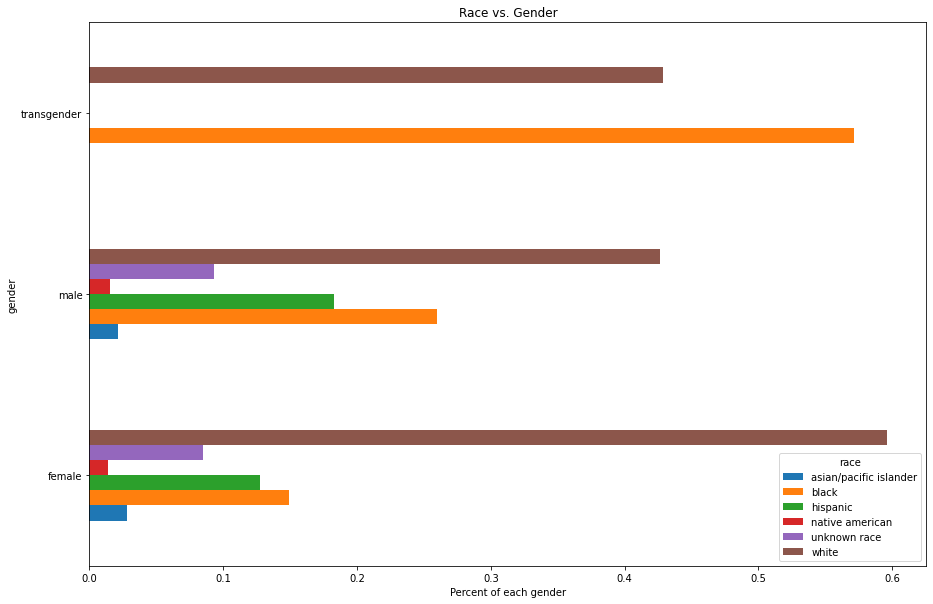

In [53]:
pd.crosstab(train.gender, train.race, normalize ='index').plot.barh(figsize=(15, 10))
plt.title("Race vs. Gender")
plt.xlabel('Percent of each gender')
plt.show()

In [54]:
pd.crosstab(train.gender, train.is_white, normalize ='index')

is_white            0         1
gender                         
female       0.404255  0.595745
male         0.573254  0.426746
transgender  0.571429  0.428571

In [55]:
pd.crosstab(df.gender, df.is_white, normalize ='index')

is_white            0         1
gender                         
female       0.386986  0.613014
male         0.563442  0.436558
transgender  0.500000  0.500000

In [56]:
pd.crosstab(train.gender, train.is_white)

is_white        0     1
gender                 
female         57    84
male         1929  1436
transgender     4     3

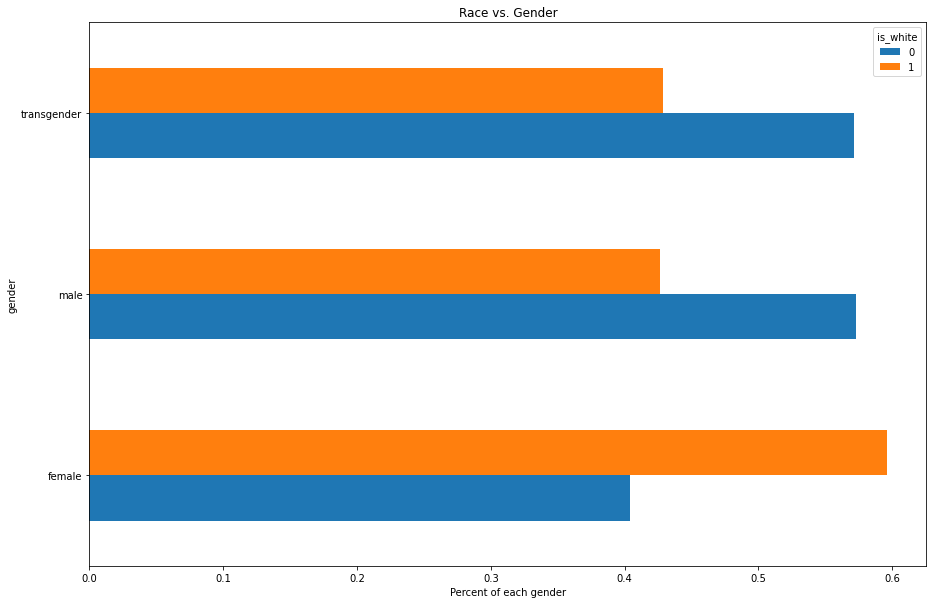

In [57]:
pd.crosstab(train.gender, train.is_white, normalize ='index').plot.barh(figsize=(15, 10))
plt.title("Race vs. Gender")
plt.xlabel('Percent of each gender')
plt.show()

In [58]:
null_hypothesis = "Gender and attacker status are INDEPENDENT."
alternative_hypothesis = "There is a relationship between gender and attacker status."
confidence_level = .95
a = 1 - confidence_level 

In [59]:
observed1 = pd.crosstab(train.gender, train.alleged_threat_lvl)
observed1

alleged_threat_lvl     0     1
gender                        
female                56    85
male                1075  2290
transgender            4     3

In [60]:
chi2, p, degf, expected = stats.chi2_contingency(observed1)

if p < a:
    print(f"We reject the null hypothesis: {null_hypothesis}")
    print(f"Therefore: {alternative_hypothesis}")
else:
    print(f"We fail to reject the null, therefore: {null_hypothesis}")
p

We fail to reject the null, therefore: Gender and attacker status are INDEPENDENT.


0.05745346768904558

In [61]:
female = train[train.gender == 'female']
male = train[train.gender == 'male']
transg = train[train.gender == 'transgender']

In [62]:
not_male = train[train.gender != 'male']

In [63]:
male_att = male.alleged_threat_lvl


In [64]:
non_male_att = not_male.alleged_threat_lvl

In [65]:
null_hypothesis = "There is not a difference between male attackers and the remaining population."
alternative_hypothesis = "Attacker status for males & total population are different."
confidence_level = .95
a = 1 - confidence_level

In [66]:
t, p = stats.ttest_ind(male_att, non_male_att)
t, p

(2.188910812715673, 0.028668961425424074)

In [67]:
if p < a:
    print(f"We reject the null hypothesis: {null_hypothesis}")
else:
    print("We fail to reject the null hypothesis")
    print(f"Not enough evidence to support the claim: {null_hypothesis}")

We reject the null hypothesis: There is not a difference between male attackers and the remaining population.


Therefore: there **is** a difference between male fatalities being attackers as opposed to the rest of the population.

In [68]:
df['age'] = np.where(df['age'].str.contains('s'), '', df.age)
df['number_age'] = pd.to_numeric(np.where(df['age'].str.contains('Unknown'), 0, df.age))

(array([-20.,   0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

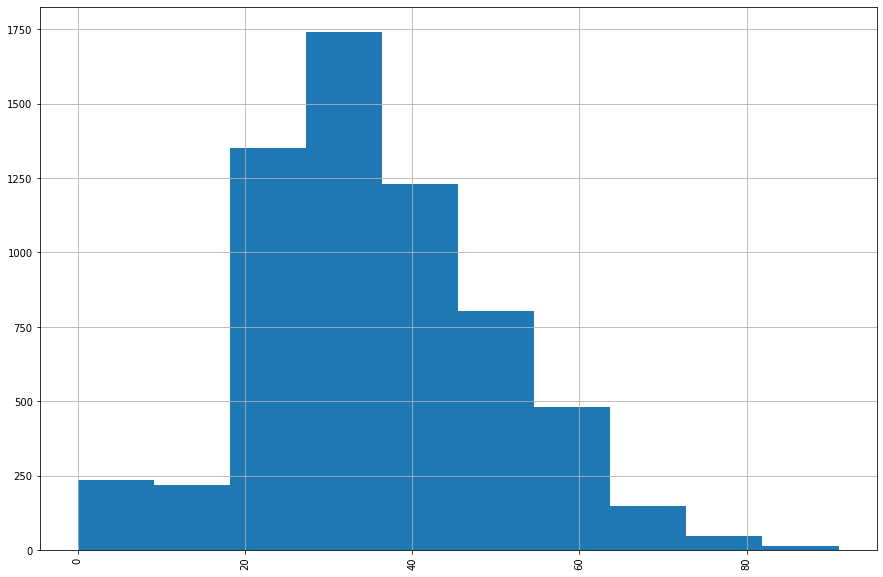

In [69]:
df.number_age.hist(figsize=(15, 10), )
plt.xticks(rotation='vertical')

<AxesSubplot:xlabel='number_age', ylabel='Count'>

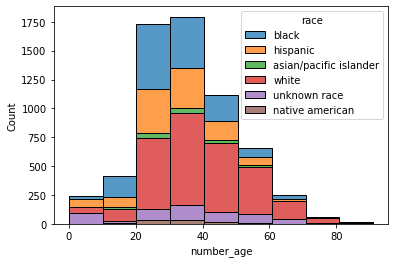

In [70]:
sns.histplot(data=df, x="number_age", hue="race", multiple="stack", bins=9)

<AxesSubplot:xlabel='number_age', ylabel='Count'>

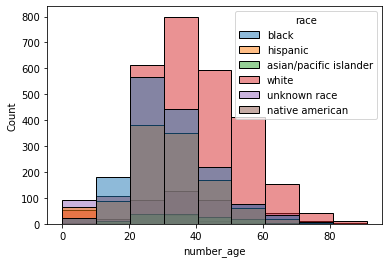

In [73]:
sns.histplot(data=df, x="number_age", hue="race", bins=9)

Text(0, 0.5, 'Number of Fatalities')

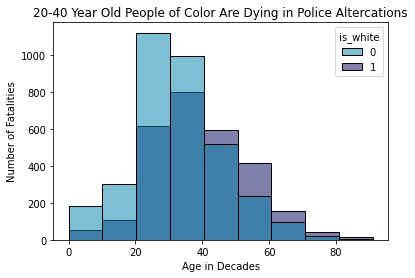

In [71]:
sns.histplot(data=df, x="number_age", hue="is_white", bins=9, palette='ocean_r')
plt.title('20-40 Year Old People of Color Are Dying in Police Altercations')
plt.xlabel('Age in Decades')
plt.ylabel('Number of Fatalities')

Text(0, 0.5, 'Number of Fatalities')

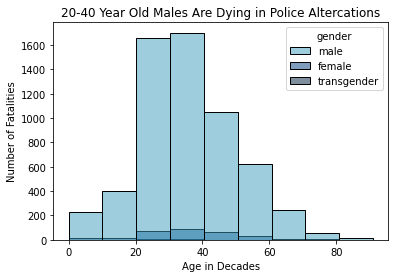

In [72]:
sns.histplot(data=df, x="number_age", hue="gender", bins=9, palette='ocean_r')
plt.title('20-40 Year Old Males Are Dying in Police Altercations')
plt.xlabel('Age in Decades')
plt.ylabel('Number of Fatalities')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=258e71fc-cf2b-48c3-8461-70ecd9787aa1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>